In [1]:
# import everythign we need and read in the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice
from collections import Counter

# ** PLEASE NOTE **
# For this notebook, you need to upload the initial dataset provided.
# For the following notebook, you will need to upload the .csv file that is produced at the end of this notebook.

df = pd.read_csv('C:/Users/tooby/Documents/Studies/3803ICT Big Data Analysis/ass 1/data.csv')

C:\Users\tooby\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# check the type of data we are dealing with
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [3]:
# fix the date and change it to date format
df['Date'] = df['Date'].map(lambda x: x.lstrip('T').rstrip('Z'))
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# header for example
df.to_csv('df_output.csv')
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [5]:
# clean up the id number so that they are all the same
df['Id'] = df['Id'].astype(str) 
df['Id'] = df['Id'].str.slice(0,9) 
df['Id'] = df['Id'].str.rstrip('&') 
df['Id'] = df['Id'].astype(int)
# Removed duplicates 
df = df.drop_duplicates()

In [6]:
# create a new working copy, just in case something breaks!
new_df = df

In [7]:
# check which columns have information missing
new_df.isnull().sum()

Id                        0
Title                     0
Company               11997
Date                      0
Location             121248
Area                 195787
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16135
LowestSalary              0
HighestSalary             0
JobType               16058
dtype: int64

In [8]:
# change all the relevant columns to title case for string searching
new_df['Title'] = new_df['Title'].str.title()
#new_df['Company'] = new_df['Company'].str.title()
#new_df['Area'] = new_df['Area'].str.title()
new_df['Classification'] = new_df['Classification'].str.title()
new_df['SubClassification'] = new_df['SubClassification'].str.title()
new_df['Requirement'] = new_df['Requirement'].str.title()
new_df['FullDescription'] = new_df['FullDescription'].str.title()
new_df['JobType'] = new_df['JobType'].str.title()

df.dtypes

Id                            int32
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [9]:
new_df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,NaN,0,30,NaN
2,37404356,Retail Sales Superstars And Stylists Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,Brand New Flagship Store Opening - Sunshine Plaza,NaN,0,30,NaN
3,37404330,Team Member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring It On - Do You Love The Great Outdoors A...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We Are Seeking Highly Articulate, Enthusiastic...",NaN,0,30,NaN


In [10]:
# ensure that there are no empty items in the Requirement and FullDescription columns
new_df.loc[new_df["Requirement"] == '',"Requirement"] = new_df["FullDescription"]
new_df.loc[new_df["Requirement"].isnull(),'Requirement'] = new_df["FullDescription"]
new_df.loc[new_df["Requirement"] == '',"Requirement"] = new_df["Title"]
new_df.loc[new_df["Requirement"].isnull(),'Requirement'] = new_df["Title"]
new_df.loc[new_df["FullDescription"] == '',"FullDescription"] = new_df["Requirement"]
new_df.loc[new_df["FullDescription"].isnull(),'FullDescription'] = new_df["Requirement"]
new_df.loc[new_df["FullDescription"] == '',"FullDescription"] = new_df["Title"]
new_df.loc[new_df["FullDescription"].isnull(),'FullDescription'] = new_df["Title"]
new_df["Company"].fillna("Unknown", inplace = True)
new_df.isnull().sum()

Id                        0
Title                     0
Company                   0
Date                      0
Location             121248
Area                 195787
Classification       121248
SubClassification    121248
Requirement               0
FullDescription           0
LowestSalary              0
HighestSalary             0
JobType               16058
dtype: int64

In [11]:
# clean the FullDescription culomn of all the HTML debris
import re as re
cleaner = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
def garbage(string):
    output = re.sub(cleaner, '', string)
    return output
new_df['FullDescription'] = new_df['FullDescription'].apply(lambda string : garbage(string))

#Counter(" ".join(new_df["FullDescription"]).split()).most_common(10000)

In [12]:
#Counter(" ".join(new_df["Requirement"]).split()).most_common(10000)

In [13]:
# see the count of occurring items i the Title column
for_plot = new_df['Title'].value_counts()
print(for_plot)

Project Manager                                                1317
Business Analyst                                                838
Business Development Manager                                    837
Administration Assistant                                        749
Executive Assistant                                             666
                                                               ... 
Banking | Customer Consultant | Graduate | Entry-Level            1
Trainee Groundspersons/Arborists                                  1
Part Time Dental Nurse/Dental Assistant Required In Pyrmont       1
Expression Of Interest | Customer Support Consultant              1
Technical Qa / Coaching Consultant                                1
Name: Title, Length: 165081, dtype: int64


In [14]:
# Make a list of job that can be used in a function
n = 337 # which is 50 occurrences or more
jobs = new_df['Title'].value_counts()[:n].index.tolist()
if 'Sales' in jobs: jobs.remove('Sales')
if 'Manager' in jobs: jobs.remove('Manager')
print(jobs)

['Project Manager', 'Business Analyst', 'Business Development Manager', 'Administration Assistant', 'Executive Assistant', 'Receptionist', 'Registered Nurse', 'Customer Service Officer', 'Administration Officer', 'Property Manager', 'Senior Project Manager', 'Account Manager', 'Payroll Officer', 'Recruitment Consultant', 'Customer Service Representative', 'Electrician', 'Senior Business Analyst', 'Medical Receptionist', 'Contract Administrator', 'Accounts Payable Officer', 'Site Manager', 'Sales Representative', 'Assistant Accountant', 'Physiotherapist', 'Early Childhood Teacher', 'Project Engineer', 'Finance Manager', 'Sales Consultant', 'Chef', 'Financial Accountant', 'Storeperson', 'Operations Manager', 'Store Manager', 'Boilermaker', 'Personal Assistant', 'Estimator', 'Accountant', 'Marketing Manager', 'Project Coordinator', 'Dental Assistant', 'Financial Controller', 'General Manager', 'Head Chef', 'Forklift Driver', 'Labourer', 'Contracts Administrator', 'Marketing Coordinator', 

In [15]:
# create a function to earch through columns and find occurrences of the above phrases
conditions = list(map(new_df['Title'].str.contains, jobs))
# create a new column and input the jobs found
new_df['TitleCategory'] = np.select(conditions, jobs, '')

In [16]:
# Original amount of Titles
for_plot = new_df['Title'].value_counts()
print(for_plot)

Project Manager                                                1317
Business Analyst                                                838
Business Development Manager                                    837
Administration Assistant                                        749
Executive Assistant                                             666
                                                               ... 
Banking | Customer Consultant | Graduate | Entry-Level            1
Trainee Groundspersons/Arborists                                  1
Part Time Dental Nurse/Dental Assistant Required In Pyrmont       1
Expression Of Interest | Customer Support Consultant              1
Technical Qa / Coaching Consultant                                1
Name: Title, Length: 165081, dtype: int64


In [17]:
# Titles found in the rest of the Title column
for_plot = new_df['TitleCategory'].value_counts()
print(for_plot)

                                        143733
Project Manager                           6106
Administrator                             4491
Receptionist                              4115
Business Analyst                          3749
                                         ...  
Sharepoint Developer                        84
Human Resources Business Partner            79
Environmental Health Officer                73
Sales And Service Banking Consultant        66
Dog Groomer                                 65
Name: TitleCategory, Length: 257, dtype: int64


In [18]:
# making sure there is something in every line of the Requirement column
new_df["Requirement"].fillna("Unknown", inplace = True)
new_df.isnull().sum()

Id                        0
Title                     0
Company                   0
Date                      0
Location             121248
Area                 195787
Classification       121248
SubClassification    121248
Requirement               0
FullDescription           0
LowestSalary              0
HighestSalary             0
JobType               16058
TitleCategory             0
dtype: int64

In [19]:
# Filter the column in the same way
conditions = list(map(new_df['Requirement'].str.contains, jobs))
new_df['TitleCategory2'] = np.select(conditions, jobs, '')

In [20]:
for_plot = new_df['TitleCategory2'].value_counts()
print(for_plot)

                                        208249
Customer Service                          6599
Project Manager                           3695
Cook                                      3466
Administrator                             3061
                                         ...  
Human Resources Manager                     40
Environmental Health Officer                25
Client Services Manager                     24
Human Resources Business Partner            18
Sales And Service Banking Consultant         1
Name: TitleCategory2, Length: 257, dtype: int64


In [21]:
# Filter the FullDescription column in the same way
conditions = list(map(new_df['FullDescription'].str.contains, jobs))
new_df['TitleCategory3'] = np.select(conditions, jobs, '')

In [22]:
for_plot = new_df['TitleCategory3'].value_counts()
print(for_plot)

                                        86852
Customer Service                        33037
Driver                                  17512
Project Manager                         11337
Administration                           9674
                                        ...  
Accounts Clerk                             10
Dog Groomer                                 6
Home Care Worker                            4
Food & Beverage Attendant                   3
Sales And Service Banking Consultant        1
Name: TitleCategory3, Length: 257, dtype: int64


In [23]:
# add all three columns together to ensure there are no missing lines.
# if there is no better/shorter version of the title, then add back the title column
new_df.loc[new_df["TitleCategory"] == '',"TitleCategory"] = new_df["TitleCategory2"]
new_df.loc[new_df["TitleCategory"].isnull(),'TitleCategory'] = new_df["TitleCategory2"]
new_df.loc[new_df["TitleCategory"] == '',"TitleCategory"] = new_df["TitleCategory3"]
new_df.loc[new_df["TitleCategory"].isnull(),'TitleCategory'] = new_df["TitleCategory3"]
new_df.loc[new_df["TitleCategory"] == '',"TitleCategory"] = new_df["Title"]
new_df.loc[new_df["TitleCategory"].isnull(),'TitleCategory'] = new_df["Title"]
for_plot = new_df['TitleCategory'].value_counts()
print(for_plot)

Customer Service                                                                  21192
Driver                                                                            13149
Administration                                                                     8268
Project Manager                                                                    8141
Administrator                                                                      5551
                                                                                  ...  
Designer - Fttn                                                                       1
Full Time Waiter/Waitress In Elsternwick                                              1
Advice Compliance                                                                     1
Mdm Architect                                                                         1
Construction Lawyers - Mid - Senior Roles In Leading Firms - Front Or Back End        1
Name: TitleCategory, Length: 410

In [24]:
new_df.isnull().sum()

Id                        0
Title                     0
Company                   0
Date                      0
Location             121248
Area                 195787
Classification       121248
SubClassification    121248
Requirement               0
FullDescription           0
LowestSalary              0
HighestSalary             0
JobType               16058
TitleCategory             0
TitleCategory2            0
TitleCategory3            0
dtype: int64

In [25]:
# The same filtering can be done for the Location column
n = 65
locations = new_df['Location'].value_counts()[:n].index.tolist()
print(locations)

['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide', 'ACT', 'Newcastle, Maitland & Hunter', 'Gold Coast', 'South West Coast VIC', 'Mackay & Coalfields', 'Port Hedland, Karratha & Pilbara', 'Wollongong, Illawarra & South Coast', 'Sunshine Coast', 'Cairns & Far North', 'Northern QLD', 'Gosford & Central Coast', 'Toowoomba & Darling Downs', 'Darwin', 'Hobart', 'Blue Mountains & Central West', 'Kalgoorlie, Goldfields & Esperance', 'Lismore & Far North Coast', 'Bendigo, Goldfields & Macedon Ranges', 'Wagga Wagga & Riverina', 'Mornington Peninsula & Bass Coast', 'Rockhampton & Capricorn Coast', 'Gladstone & Central QLD', 'Dubbo & Central NSW', 'Bunbury & South West', 'Tamworth & North West NSW', 'Ballarat & Central Highlands', 'Shepparton & Goulburn Valley', 'West Gippsland & Latrobe Valley', 'Western QLD', 'Yarra Valley & High Country', 'Port Macquarie & Mid North Coast', 'Southern Highlands & Tablelands', 'Coffs Harbour & North Coast', 'Albury Area', 'Bundaberg & Wide Bay Burnett', 'La

In [26]:
for_plot = new_df['Location'].value_counts()
print(for_plot)

Sydney                                  60729
Melbourne                               46656
Brisbane                                21455
Perth                                   13192
Adelaide                                 6650
                                        ...  
Yorke Peninsula & Clare Valley             96
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: Location, Length: 65, dtype: int64


In [27]:
conditions = list(map(new_df['Title'].str.contains, locations))
new_df['Location1'] = np.select(conditions, locations, '')

In [28]:
for_plot = new_df['Location1'].value_counts()
print(for_plot)

                                 307100
Sydney                             4001
Melbourne                          2555
Brisbane                           1911
Perth                              1010
Adelaide                            629
Gold Coast                          437
Darwin                              301
Sunshine Coast                      238
Hobart                              165
Whyalla & Eyre Peninsula              3
Cairns & Far North                    3
Gosford & Central Coast               2
Mackay & Coalfields                   2
Coffs Harbour & North Coast           2
Albany & Great Southern               2
Lismore & Far North Coast             2
Bairnsdale & Gippsland                1
Shepparton & Goulburn Valley          1
Mildura & Murray                      1
Blue Mountains & Central West         1
Mt Gambier & Limestone Coast          1
Bunbury & South West                  1
Name: Location1, dtype: int64


In [29]:
new_df.loc[new_df["FullDescription"] == '',"FullDescription"] = new_df["Title"]
new_df.loc[new_df["FullDescription"].isnull(),'FullDescription'] = new_df["Title"]

In [30]:
conditions = list(map(new_df['FullDescription'].str.contains, locations))
new_df['Location2'] = np.select(conditions, locations, '')

In [31]:
for_plot = new_df['Location2'].value_counts()
print(for_plot)

                                    213688
Sydney                               41265
Melbourne                            28043
Brisbane                             14604
Perth                                10520
Adelaide                              4346
Gold Coast                            2508
Darwin                                1542
Sunshine Coast                        1035
Hobart                                 811
Albury Area                              5
Port Hedland, Karratha & Pilbara         1
Broome & Kimberley                       1
Name: Location2, dtype: int64


In [32]:
conditions = list(map(new_df['Requirement'].str.contains, locations))
new_df['Location3'] = np.select(conditions, locations, '')

In [33]:
for_plot = new_df['Location3'].value_counts()
print(for_plot)

                                     283159
Sydney                                13117
Melbourne                              9179
Brisbane                               5126
Perth                                  3640
Adelaide                               1531
Gold Coast                             1099
Darwin                                  727
Sunshine Coast                          491
Hobart                                  280
Albury Area                               3
Mornington Peninsula & Bass Coast         3
Coffs Harbour & North Coast               2
Port Hedland, Karratha & Pilbara          2
Broome & Kimberley                        2
Bunbury & South West                      2
Lismore & Far North Coast                 2
Newcastle, Maitland & Hunter              1
Bairnsdale & Gippsland                    1
Shepparton & Goulburn Valley              1
West Gippsland & Latrobe Valley           1
Name: Location3, dtype: int64


In [34]:
new_df['Location'].where((pd.notnull(new_df['Location'])), None)
new_df['Location1'].where((pd.notnull(new_df['Location1'])), None)
new_df['Location2'].where((pd.notnull(new_df['Location2'])), None)
new_df['Location3'].where((pd.notnull(new_df['Location3'])), None)

0          
1          
2          
3          
4          
         ..
318472     
318473     
318474     
318475     
318476     
Name: Location3, Length: 318369, dtype: object

In [35]:
new_df.loc[new_df["Location"] == '',"Location"] = new_df["Location1"]
new_df.loc[new_df["Location"].isnull(),'Location'] = new_df["Location1"]
new_df.loc[new_df["Location"] == '',"Location"] = new_df["Location2"]
new_df.loc[new_df["Location"].isnull(),'Location'] = new_df["Location2"]
new_df.loc[new_df["Location"] == '',"Location"] = new_df["Location3"]
new_df.loc[new_df["Location"].isnull(),'Location'] = new_df["Location3"]
new_df.loc[new_df["Location"] == '',"Location"] = new_df["Location1"]
new_df.loc[new_df["Location"].isnull(),'Location'] = new_df["Location1"]

In [36]:
new_df.isnull().sum()

Id                        0
Title                     0
Company                   0
Date                      0
Location                  0
Area                 195787
Classification       121248
SubClassification    121248
Requirement               0
FullDescription           0
LowestSalary              0
HighestSalary             0
JobType               16058
TitleCategory             0
TitleCategory2            0
TitleCategory3            0
Location1                 0
Location2                 0
Location3                 0
dtype: int64

In [37]:
for_plot = new_df['Location'].value_counts()
print(for_plot)

Sydney                                  78044
                                        76938
Melbourne                               58700
Brisbane                                27543
Perth                                   17673
                                        ...  
Yorke Peninsula & Clare Valley             96
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: Location, Length: 66, dtype: int64


In [38]:
# And the same filtering can be done for the Area column
for_plot = new_df['Area'].value_counts()
print(for_plot)

CBD & Inner Suburbs                    32144
CBD, Inner West & Eastern Suburbs      29048
Parramatta & Western Suburbs            8759
Bayside & South Eastern Suburbs         6702
North Shore & Northern Beaches          6647
Northern Suburbs                        6434
Eastern Suburbs                         6357
CBD, Inner & Western Suburbs            5568
Western Suburbs                         4283
South West & M5 Corridor                3190
Southern Suburbs & Sutherland Shire     2237
Southern Suburbs & Logan                2137
Ryde & Macquarie Park                   1960
North West & Hills District             1905
Fremantle & Southern Suburbs            1802
Northern Suburbs & Joondalup            1199
Western Suburbs & Ipswich               1190
Bayside & Eastern Suburbs                656
Rockingham & Kwinana                     364
Name: Area, dtype: int64


In [39]:
n = 19
areas = new_df['Area'].value_counts()[:n].index.tolist()
print(areas)

['CBD & Inner Suburbs', 'CBD, Inner West & Eastern Suburbs', 'Parramatta & Western Suburbs', 'Bayside & South Eastern Suburbs', 'North Shore & Northern Beaches', 'Northern Suburbs', 'Eastern Suburbs', 'CBD, Inner & Western Suburbs', 'Western Suburbs', 'South West & M5 Corridor', 'Southern Suburbs & Sutherland Shire', 'Southern Suburbs & Logan', 'Ryde & Macquarie Park', 'North West & Hills District', 'Fremantle & Southern Suburbs', 'Northern Suburbs & Joondalup', 'Western Suburbs & Ipswich', 'Bayside & Eastern Suburbs', 'Rockingham & Kwinana']


In [40]:
conditions = list(map(new_df['Title'].str.contains, areas))
new_df['Area1'] = np.select(conditions, areas, '')

In [41]:
for_plot = new_df['Area1'].value_counts()
print(for_plot)

                                   317449
Eastern Suburbs                       416
Western Suburbs                       259
Northern Suburbs                      231
North Shore & Northern Beaches          6
Bayside & South Eastern Suburbs         2
Rockingham & Kwinana                    2
Southern Suburbs & Logan                1
Fremantle & Southern Suburbs            1
Ryde & Macquarie Park                   1
South West & M5 Corridor                1
Name: Area1, dtype: int64


In [42]:
conditions = list(map(new_df['FullDescription'].str.contains, areas))
new_df['Area2'] = np.select(conditions, areas, '')

In [43]:
for_plot = new_df['Area2'].value_counts()
print(for_plot)

                    310561
Eastern Suburbs       3481
Western Suburbs       2424
Northern Suburbs      1903
Name: Area2, dtype: int64


In [44]:
conditions = list(map(new_df['Requirement'].str.contains, areas))
new_df['Area3'] = np.select(conditions, areas, '')

In [45]:
for_plot = new_df['Area3'].value_counts()
print(for_plot)

                                   315164
Eastern Suburbs                      1341
Western Suburbs                      1078
Northern Suburbs                      773
North Shore & Northern Beaches          9
South West & M5 Corridor                2
Parramatta & Western Suburbs            1
Bayside & South Eastern Suburbs         1
Name: Area3, dtype: int64


In [46]:
new_df['Area'].where((pd.notnull(new_df['Area'])), None)
new_df['Area1'].where((pd.notnull(new_df['Area1'])), None)
new_df['Area2'].where((pd.notnull(new_df['Area2'])), None)
new_df['Area3'].where((pd.notnull(new_df['Area3'])), None)

0          
1          
2          
3          
4          
         ..
318472     
318473     
318474     
318475     
318476     
Name: Area3, Length: 318369, dtype: object

In [47]:
new_df.loc[new_df["Area"] == '',"Area"] = new_df["Area1"]
new_df.loc[new_df["Area"].isnull(),'Area'] = new_df["Area1"]
new_df.loc[new_df["Area"] == '',"Area"] = new_df["Area2"]
new_df.loc[new_df["Area"].isnull(),'Area'] = new_df["Area2"]
new_df.loc[new_df["Area"] == '',"Area"] = new_df["Area3"]
new_df.loc[new_df["Area"].isnull(),'Area'] = new_df["Area3"]
for_plot = new_df['Area'].value_counts()
print(for_plot)

                                       191469
CBD & Inner Suburbs                     32144
CBD, Inner West & Eastern Suburbs       29048
Parramatta & Western Suburbs             8759
Eastern Suburbs                          8227
Northern Suburbs                         7574
Bayside & South Eastern Suburbs          6702
North Shore & Northern Beaches           6653
Western Suburbs                          5581
CBD, Inner & Western Suburbs             5568
South West & M5 Corridor                 3192
Southern Suburbs & Sutherland Shire      2237
Southern Suburbs & Logan                 2138
Ryde & Macquarie Park                    1960
North West & Hills District              1905
Fremantle & Southern Suburbs             1803
Northern Suburbs & Joondalup             1199
Western Suburbs & Ipswich                1190
Bayside & Eastern Suburbs                 656
Rockingham & Kwinana                      364
Name: Area, dtype: int64


In [48]:
new_df.isnull().sum()

Id                        0
Title                     0
Company                   0
Date                      0
Location                  0
Area                      0
Classification       121248
SubClassification    121248
Requirement               0
FullDescription           0
LowestSalary              0
HighestSalary             0
JobType               16058
TitleCategory             0
TitleCategory2            0
TitleCategory3            0
Location1                 0
Location2                 0
Location3                 0
Area1                     0
Area2                     0
Area3                     0
dtype: int64

In [49]:
# Classification is populated with the most occuring classification for a particular title
for_plot = new_df['Classification'].value_counts()
print(for_plot)

Information & Communication Technology    22787
Trades & Services                         17966
Healthcare & Medical                      17068
Hospitality & Tourism                     15513
Manufacturing, Transport & Logistics      12372
Administration & Office Support           10017
Accounting                                 9365
Education & Training                       9272
Construction                               8369
Sales                                      8112
Retail & Consumer Products                 8040
Government & Defence                       7435
Engineering                                6453
Mining, Resources & Energy                 6286
Banking & Financial Services               4632
Community Services & Development           4484
Legal                                      4232
Human Resources & Recruitment              4140
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property                  

In [50]:
# the same can be done for the sub-classification column
for_plot = new_df['SubClassification'].value_counts()
print(for_plot)

Other                         11341
Management                     6230
Chefs/Cooks                    4596
Administrative Assistants      4571
Developers/Programmers         4210
                              ...  
Modelling & Simulation           14
Computer Operators               13
Air Force                        12
Chiropractic & Osteopathic       11
Army                              5
Name: SubClassification, Length: 338, dtype: int64


In [51]:
new_df.loc[new_df['Classification'].isna(), 'Classification'] = new_df.groupby(['TitleCategory'])['Classification'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

In [52]:
new_df.loc[new_df['Classification'].isna(), 'Classification'] = new_df.groupby(['Title'])['Classification'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

In [53]:
new_df.loc[new_df['SubClassification'].isna(), 'SubClassification'] = new_df.groupby(['TitleCategory'])['SubClassification'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

In [54]:
new_df.loc[new_df['SubClassification'].isna(), 'SubClassification'] = new_df.groupby(['Title'])['SubClassification'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

In [55]:
for_plot = new_df['Classification'].value_counts()
print(for_plot)

Information & Communication Technology    34397
Trades & Services                         26762
Healthcare & Medical                      23773
Administration & Office Support           22765
Manufacturing, Transport & Logistics      22246
Hospitality & Tourism                     21133
Retail & Consumer Products                19549
Sales                                     14765
Accounting                                14614
Education & Training                      11814
Construction                              11566
Government & Defence                      10445
Mining, Resources & Energy                 9013
Engineering                                8884
Human Resources & Recruitment              6118
Community Services & Development           5891
Marketing & Communications                 5872
Banking & Financial Services               5587
Legal                                      5389
Call Centre & Customer Service             5327
Real Estate & Property                  

In [56]:
for_plot = new_df['SubClassification'].value_counts()
print(for_plot)

Other                         14812
Administrative Assistants     13558
Retail Assistants             13205
Management                    11837
Chefs/Cooks                    7437
                              ...  
Computer Operators               14
Modelling & Simulation           14
Air Force                        13
Chiropractic & Osteopathic       11
Army                              5
Name: SubClassification, Length: 338, dtype: int64


In [57]:
# the same can also be done for the job-type column
for_plot = new_df['JobType'].value_counts()
print(for_plot)

Full Time          201172
Contract/Temp       53897
Casual/Vacation     25353
Part Time           21889
Name: JobType, dtype: int64


In [58]:
new_df.loc[new_df['JobType'].isna(), 'JobType'] = new_df.groupby(['TitleCategory'])['JobType'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

In [59]:
new_df.loc[new_df['JobType'].isna(), 'JobType'] = new_df.groupby(['Title'])['JobType'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

In [60]:
for_plot = new_df['JobType'].value_counts()
print(for_plot)

Full Time          211003
Contract/Temp       55648
Casual/Vacation     26304
Part Time           22271
Name: JobType, dtype: int64


In [61]:
new_df.isnull().sum()

Id                       0
Title                    0
Company                  0
Date                     0
Location                 0
Area                     0
Classification       15559
SubClassification    15559
Requirement              0
FullDescription          0
LowestSalary             0
HighestSalary            0
JobType               3143
TitleCategory            0
TitleCategory2           0
TitleCategory3           0
Location1                0
Location2                0
Location3                0
Area1                    0
Area2                    0
Area3                    0
dtype: int64

In [62]:
new_df.shape

(318369, 22)

In [63]:
new_df["Company"].fillna("Unknown", inplace = True)
new_df["Area"].fillna("Unknown", inplace = True)
new_df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,...,JobType,TitleCategory,TitleCategory2,TitleCategory3,Location1,Location2,Location3,Area1,Area2,Area3
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,Our Casual Stock Replenishers Pride Themselves...,...,Casual/Vacation,Casual Stock Replenisher,,,,,,,,
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,Our Casual Stock Replenishers Pride Themselves...,...,Casual/Vacation,Casual Stock Replenisher,,,,,,,,
2,37404356,Retail Sales Superstars And Stylists Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,Brand New Flagship Store Opening - Sunshine Plaza,Brand New Flagship Store Opening - Sunshine Plaza,...,Casual/Vacation,Retail Sales Superstars And Stylists Wanted - ...,,,,,,,,
3,37404330,Team Member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,,Retail & Consumer Products,Retail Assistants,Bring It On - Do You Love The Great Outdoors A...,Bring It On - Do You Love The Great Outdoors A...,...,NaN,Team Member - Belrose,,,,,,,,
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We Are Seeking Highly Articulate, Enthusiastic...","We Are Seeking Highly Articulate, Enthusiastic...",...,NaN,"Business Banking Contact Centre Specialist, Ni...",,,Sydney,,,,,


In [64]:
new_df.to_csv('output.csv')
new_df.shape

(318369, 22)

In [65]:
new_df.Location.replace('','Unknown',regex = True)

0                          Sydney
1           Richmond & Hawkesbury
2                        Brisbane
3         Gosford & Central Coast
4                          Sydney
                   ...           
318472                    Unknown
318473                    Unknown
318474                    Unknown
318475                    Unknown
318476                    Unknown
Name: Location, Length: 318369, dtype: object

In [66]:
new_df.Area.replace('','Unknown',regex = True)

0         North West & Hills District
1                             Unknown
2                 CBD & Inner Suburbs
3                             Unknown
4               Ryde & Macquarie Park
                     ...             
318472                        Unknown
318473                        Unknown
318474                        Unknown
318475                        Unknown
318476                        Unknown
Name: Area, Length: 318369, dtype: object

In [67]:
new_df.isnull().sum()

Id                       0
Title                    0
Company                  0
Date                     0
Location                 0
Area                     0
Classification       15559
SubClassification    15559
Requirement              0
FullDescription          0
LowestSalary             0
HighestSalary            0
JobType               3143
TitleCategory            0
TitleCategory2           0
TitleCategory3           0
Location1                0
Location2                0
Location3                0
Area1                    0
Area2                    0
Area3                    0
dtype: int64

In [68]:
new_df = new_df.dropna(subset = ['Classification'])
new_df.isnull().sum()

Id                      0
Title                   0
Company                 0
Date                    0
Location                0
Area                    0
Classification          0
SubClassification       0
Requirement             0
FullDescription         0
LowestSalary            0
HighestSalary           0
JobType              2075
TitleCategory           0
TitleCategory2          0
TitleCategory3          0
Location1               0
Location2               0
Location3               0
Area1                   0
Area2                   0
Area3                   0
dtype: int64

In [69]:
new_df = new_df.dropna(subset = ['JobType'])
new_df.isnull().sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
TitleCategory        0
TitleCategory2       0
TitleCategory3       0
Location1            0
Location2            0
Location3            0
Area1                0
Area2                0
Area3                0
dtype: int64

In [70]:
new_df.shape

(300735, 22)

In [71]:
new_df.isnull().sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
TitleCategory        0
TitleCategory2       0
TitleCategory3       0
Location1            0
Location2            0
Location3            0
Area1                0
Area2                0
Area3                0
dtype: int64

In [72]:
# drop unneeded columns
new_df = new_df.drop(['TitleCategory2'], axis = 1)
new_df = new_df.drop(['TitleCategory3'], axis = 1)
new_df = new_df.drop(['Location1'], axis = 1)
new_df = new_df.drop(['Location2'], axis = 1)
new_df = new_df.drop(['Location3'], axis = 1)
new_df = new_df.drop(['Area1'], axis = 1)
new_df = new_df.drop(['Area2'], axis = 1)
new_df = new_df.drop(['Area3'], axis = 1)

In [73]:
# create an average salary column
new_df["AverageSalary"] = (new_df["LowestSalary"] + new_df["HighestSalary"])/2

In [74]:
# repace all lowest salary of 0 with the average
new_df.loc[df['LowestSalary'] == 0, 'LowestSalary'] = new_df["AverageSalary"]
new_df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,TitleCategory,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,Our Casual Stock Replenishers Pride Themselves...,15.0,30,Casual/Vacation,Casual Stock Replenisher,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,Our Casual Stock Replenishers Pride Themselves...,15.0,30,Casual/Vacation,Casual Stock Replenisher,15.0
2,37404356,Retail Sales Superstars And Stylists Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,Brand New Flagship Store Opening - Sunshine Plaza,Brand New Flagship Store Opening - Sunshine Plaza,15.0,30,Casual/Vacation,Retail Sales Superstars And Stylists Wanted - ...,15.0
6,37404355,Casual Café All-Rounder In Semaphore,Jora Local,2018-10-07,Adelaide,,Hospitality & Tourism,Waiting Staff,A Cafe/Restaurant In Semaphore Is Seeking A Ca...,A Cafe/Restaurant In Semaphore Is Seeking A Ca...,15.0,30,Casual/Vacation,Casual Café All-Rounder In Semaphore,15.0
7,37404350,Casual Café All-Rounder In Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A Cafe In Woolloongabba Is Seeking A Casual Ca...,A Cafe In Woolloongabba Is Seeking A Casual Ca...,15.0,30,Casual/Vacation,Casual Café All-Rounder In Woolloongabba,15.0


In [75]:
new_df.to_csv('new_df_output.csv')
new_df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,TitleCategory,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,Our Casual Stock Replenishers Pride Themselves...,15.0,30,Casual/Vacation,Casual Stock Replenisher,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,Our Casual Stock Replenishers Pride Themselves...,15.0,30,Casual/Vacation,Casual Stock Replenisher,15.0
2,37404356,Retail Sales Superstars And Stylists Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,Brand New Flagship Store Opening - Sunshine Plaza,Brand New Flagship Store Opening - Sunshine Plaza,15.0,30,Casual/Vacation,Retail Sales Superstars And Stylists Wanted - ...,15.0
6,37404355,Casual Café All-Rounder In Semaphore,Jora Local,2018-10-07,Adelaide,,Hospitality & Tourism,Waiting Staff,A Cafe/Restaurant In Semaphore Is Seeking A Ca...,A Cafe/Restaurant In Semaphore Is Seeking A Ca...,15.0,30,Casual/Vacation,Casual Café All-Rounder In Semaphore,15.0
7,37404350,Casual Café All-Rounder In Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A Cafe In Woolloongabba Is Seeking A Casual Ca...,A Cafe In Woolloongabba Is Seeking A Casual Ca...,15.0,30,Casual/Vacation,Casual Café All-Rounder In Woolloongabba,15.0


In [ ]:
pie_colours = ['navy', 'mediumblue', 'royalblue', 'cornflowerblue', 'skyblue', 'turquoise', 'mediumspringgreen',
               'lime', 'greenyellow', 'yellow', 'gold']
for_plot = df.loc[df['Location'] == 'Sydney', 'SalaryRange'].value_counts().plot.pie(y = '',
                                                                                     figsize=(10,10),
                                                                                     colors = pie_colours,
                                                                                     fontsize = 16)

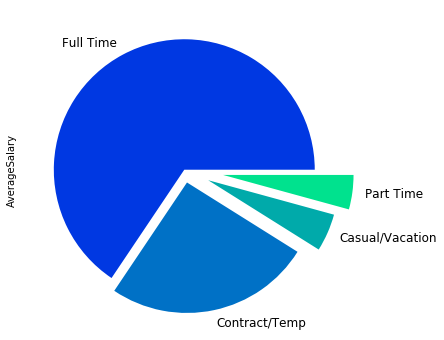

In [76]:
pie = new_df.groupby('JobType')['AverageSalary'].sum().sort_values(ascending=False)
colors = ['#0038E2', '#0071C6', '#00AAAA', '#00E28E']
explode = (0, 0.1, 0.2, 0.3)
pie.plot(kind='pie', fontsize=12,colors=colors,explode=explode, figsize=(10, 6))
plt.show()

In [77]:
for_plot = new_df['Location'].value_counts()
print(for_plot)

Sydney                                  75205
                                        66937
Melbourne                               56606
Brisbane                                26574
Perth                                   16963
                                        ...  
Yorke Peninsula & Clare Valley             95
Tumut, Snowy & Monaro                      84
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: Location, Length: 66, dtype: int64


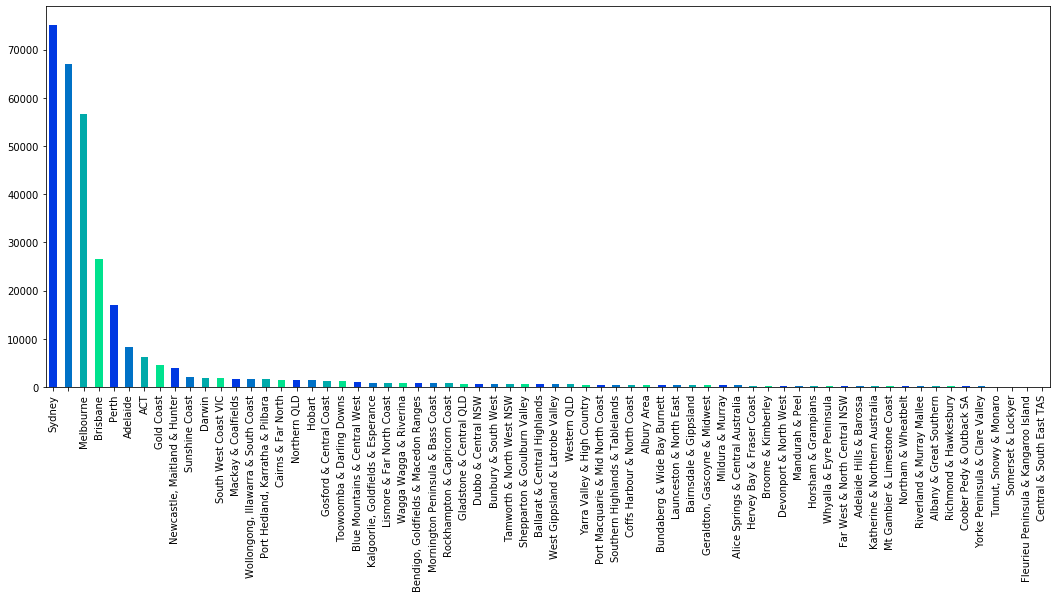

In [78]:
#my_colours = list(islice(cycle(['mediumorchid', 'orchid', 'hotpink', 'salmon', 'coral', 'orange', 'gold', 'yellow',
#                               'greenyellow', 'lawngreen', 'springgreen', 'turquoise', 'deepskyblue', 
#                                'mediumslateblue', 'blueviolet']), None, len(new_df)))
my_colours = list(islice(cycle(['#0038E2', '#0071C6', '#00AAAA', '#00E28E']), None, len(new_df)))
for_plot.plot.bar(figsize=(18,7), color=my_colours)
#for_plot.plot.bar(figsize=(18,7))

In [79]:
for_plot = new_df['Classification'].value_counts()
print(for_plot)

Information & Communication Technology    34108
Trades & Services                         26665
Healthcare & Medical                      23631
Administration & Office Support           22704
Manufacturing, Transport & Logistics      22155
Hospitality & Tourism                     20923
Retail & Consumer Products                19468
Sales                                     14721
Accounting                                14544
Education & Training                      11692
Construction                              11534
Government & Defence                      10257
Mining, Resources & Energy                 8937
Engineering                                8828
Human Resources & Recruitment              6059
Community Services & Development           5834
Marketing & Communications                 5806
Banking & Financial Services               5491
Legal                                      5346
Call Centre & Customer Service             5287
Real Estate & Property                  

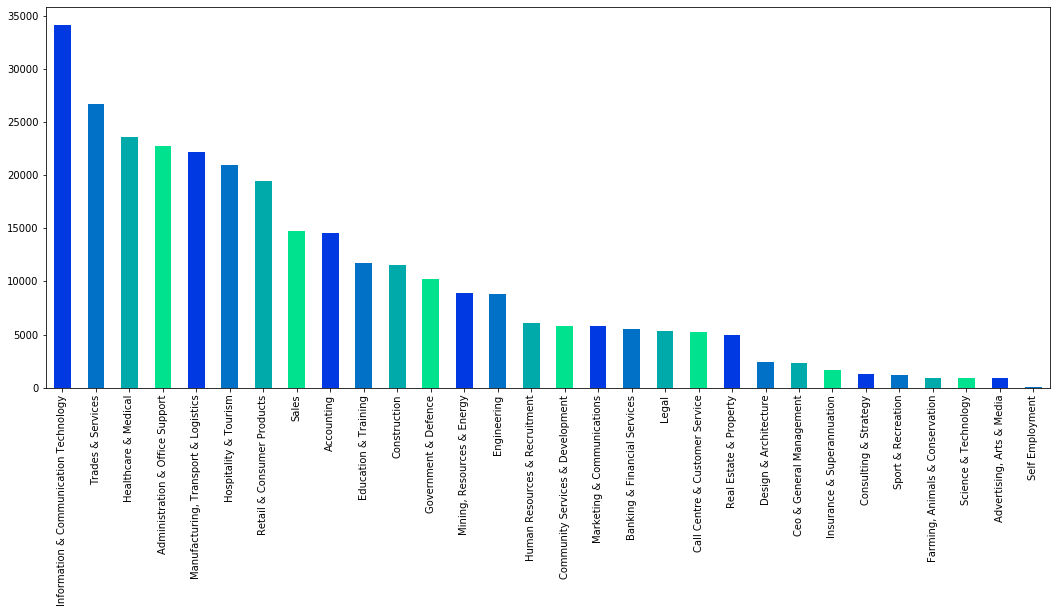

In [80]:
#my_colours = list(islice(cycle(['mediumorchid', 'orchid', 'hotpink', 'salmon', 'coral', 'orange', 'gold', 'yellow',
#                               'greenyellow', 'lawngreen', 'springgreen', 'turquoise', 'deepskyblue', 
#                                'mediumslateblue', 'blueviolet']), None, len(new_df)))
my_colours = list(islice(cycle(['#0038E2', '#0071C6', '#00AAAA', '#00E28E']), None, len(new_df)))
for_plot.plot.bar(figsize=(18,7), color=my_colours)